# Covid 19 Data Analysis
- **Created by Andrés Segura Tinoco**
- **Created on Apr 27, 2020**

## 1. Read C19 data

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# Reading data from CSV file
dataURL = "../data/current_data.csv"
raw_data = pd.read_csv(dataURL, usecols = lambda column : column not in ["row_index", "date", "datestamp"])

In [4]:
# Show first 10 rows of header dataframe
raw_data.head(10)

,country,total_cases,total_deaths,total_recovered,active_cases,serious_critical,tot_cases_1m_pop,deaths_1m_pop,total_tests,tests_1m_pop
0,USA,1013128,57037,139419,816672,14187,3127.45,176.07,5714109,17639.02
1,Italy,199414,26977,66624,105813,1956,3287.10,444.68,1789662,29500.47
2,Spain,232128,23822,123903,84403,7764,4998.62,512.98,1345560,28975.14
3,France,165842,23293,45513,97036,4608,2486.01,349.17,463662,6950.41
4,UK,157149,21092,-1,135713,1559,2413.59,323.94,719910,11056.83
5,Belgium,47334,7331,10943,29060,876,4181.63,647.64,220204,19453.49
6,Germany,159038,6161,117400,35477,2409,1944.92,75.34,2072669,25347.27
7,Iran,92584,5877,72439,14268,2983,1166.49,74.05,442590,5576.30
8,China,82836,4633,77555,648,50,60.14,3.36,0,0.00
9,Brazil,67446,4603,31142,31701,8318,327.19,22.33,339552,1647.22


In [5]:
# Create numerical dataset
dataset = raw_data.drop(columns=["country"])
col_list = dataset.columns

## 2. Data Quality process with Standardization

In [6]:
# Filter data
min_deaths = 100
x = dataset.loc[dataset['total_deaths'] >= min_deaths]

In [7]:
# Standardize the Data
x = StandardScaler().fit_transform(x)

# Show skills data in temporary dataframe
norm_data = pd.DataFrame(data = x, columns = col_list)
norm_data.head()

,total_cases,total_deaths,total_recovered,active_cases,serious_critical,tot_cases_1m_pop,deaths_1m_pop,total_tests,tests_1m_pop
0,6.558570,5.402526,3.721279,6.821829,5.194420,1.635669,0.643555,5.594604,0.589007
1,0.972422,2.333217,1.501928,0.607934,0.345295,1.769294,2.545534,1.407483,1.693190
2,1.197004,2.011072,3.248232,0.420781,2.647946,3.201821,3.029154,0.933656,1.644287
3,0.741950,1.957058,0.858302,0.531211,1.396712,1.098789,1.869245,-0.007269,-0.405997
4,0.682273,1.732322,-0.529315,0.869302,0.187900,1.038174,1.690596,0.266130,-0.023730


## 3. Correlation matrix between Countries

In [8]:
# Calculate skills correlations
corr = norm_data.corr()
corr

,total_cases,total_deaths,total_recovered,active_cases,serious_critical,tot_cases_1m_pop,deaths_1m_pop,total_tests,tests_1m_pop
total_cases,1.000000,0.925031,0.746916,0.979945,0.864251,0.430055,0.320870,0.890489,0.196370
total_deaths,0.925031,1.000000,0.738557,0.880393,0.835395,0.570943,0.567360,0.776574,0.229241
total_recovered,0.746916,0.738557,1.000000,0.601175,0.759497,0.495717,0.389604,0.688656,0.283861
active_cases,0.979945,0.880393,0.601175,1.000000,0.811186,0.356490,0.248138,0.869946,0.149027
serious_critical,0.864251,0.835395,0.759497,0.811186,1.000000,0.432287,0.360240,0.761277,0.151237
tot_cases_1m_pop,0.430055,0.570943,0.495717,0.356490,0.432287,1.000000,0.862524,0.364996,0.704470
deaths_1m_pop,0.320870,0.567360,0.389604,0.248138,0.360240,0.862524,1.000000,0.232038,0.427346
total_tests,0.890489,0.776574,0.688656,0.869946,0.761277,0.364996,0.232038,1.000000,0.321790
tests_1m_pop,0.196370,0.229241,0.283861,0.149027,0.151237,0.704470,0.427346,0.321790,1.000000


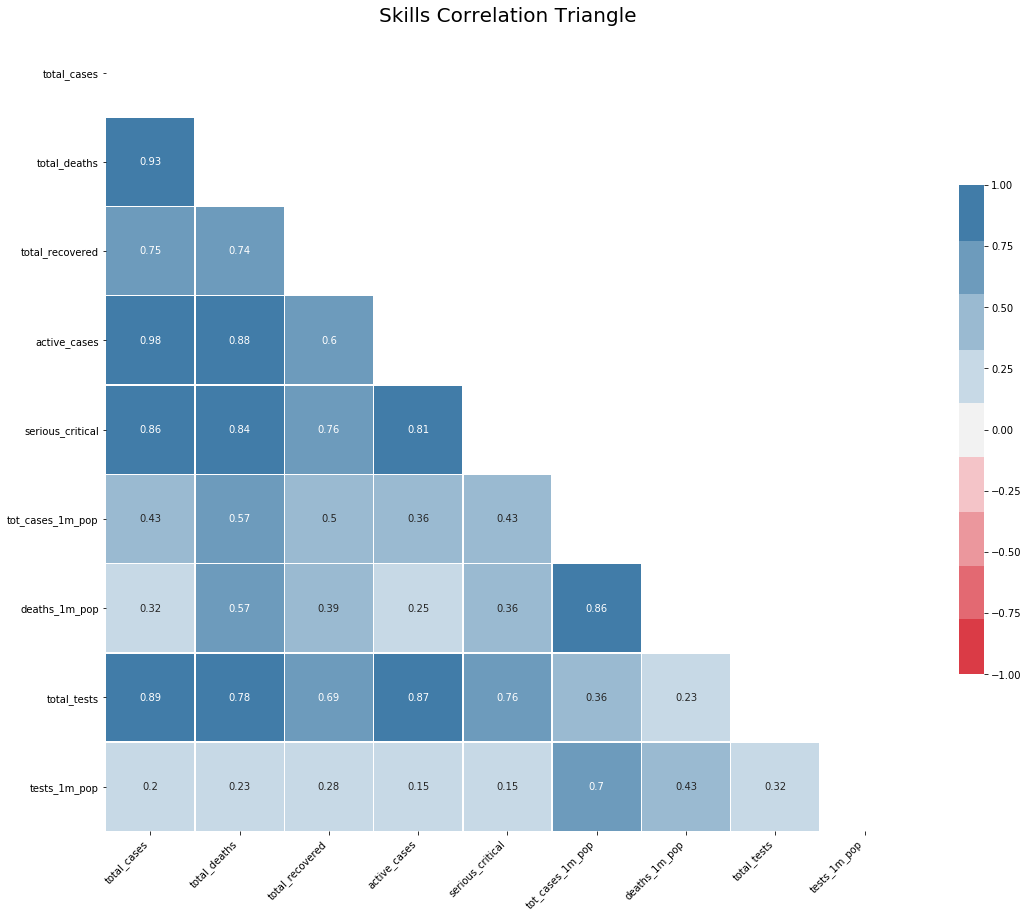

In [9]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax1 = plt.subplots(figsize = (18, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 240, n = 9)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap = cmap, vmin = -1, vmax = 1, center = 0,
            square = True, linewidths = .5, cbar_kws = {"shrink": .5}, annot=True)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 45, horizontalalignment = 'right');

# Add title
ax1.set_title("Skills Correlation Triangle", fontsize = 20)
plt.show()

## 4. PCA Process

In [10]:
# Principal Component Analysis
pca = PCA(n_components = 5)
pca_data = pca.fit_transform(x)
len(pca_data)

51

In [11]:
# Create and show principal components DataFrame
df_pca = pd.DataFrame(data = pca_data, columns = ["PC1", "PC2", "PC3", "PC4", "PC5"])
df_pca = pd.concat([df_pca, raw_data["country"]], axis = 1)
df_pca = df_pca[df_pca["PC1"].notnull()]
df_pca

,PC1,PC2,PC3,PC4,PC5,country
0,13.206274,4.182679,0.699783,-1.249623,0.092673,USA
1,4.069691,-2.211577,-0.297419,-0.066487,-1.102335,Italy
2,5.747697,-2.848945,-1.117645,1.865882,0.531214,Spain
3,2.754855,-0.631957,-1.944367,0.043657,0.270840,France
4,1.946920,-0.847394,-1.230431,-1.469149,-0.277739,UK
5,1.650839,-3.839207,-1.931974,-0.889336,-0.298158,Belgium
6,2.603714,-0.298659,1.400727,2.311075,-0.900355,Germany
7,0.829948,0.511408,-0.512025,1.600461,0.006837,Iran
8,-0.302967,1.184156,-0.545764,1.751734,-0.911236,China
9,0.732467,1.564358,-0.785665,1.070607,2.156663,Brazil


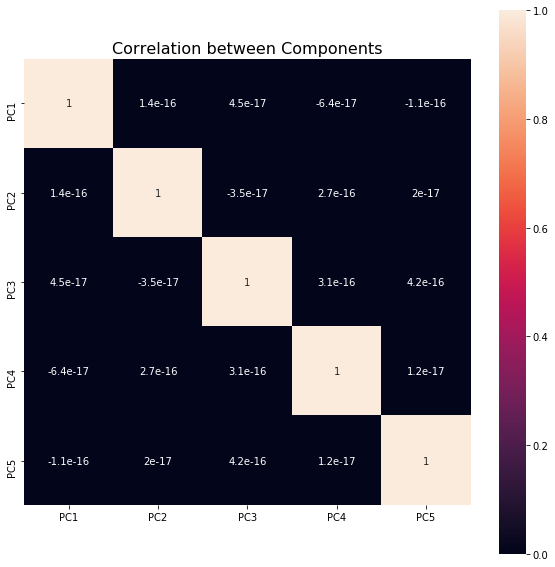

In [12]:
# Show correlation between components
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(df_pca.corr(), square=True, annot=True)
ax.set_title("Correlation between Components", fontsize = 16)
plt.show()

## 5. PCA Variance Ratio

In [13]:
# The explained variance tells us how much information (variance) can be attributed to each of the principal components
list(pca.explained_variance_ratio_)

[0.6341358840910942,
 0.1970232324978292,
 0.07597716028762096,
 0.04745658430783172,
 0.019950132672159917]

In [14]:
# Create horizontal bar chart data
bars = ("PC1", "PC2", "PC3", "PC4", "PC5")
y_pos = np.arange(len(bars))
values = pca.explained_variance_ratio_ * 100
cum = np.cumsum(values)

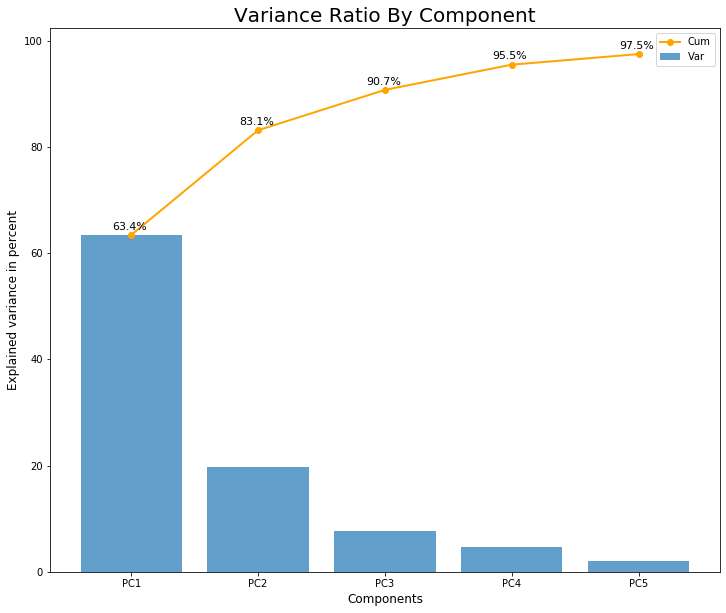

In [15]:
fig, ax2 = plt.subplots(figsize = (12, 10))

plt.bar(y_pos, values, align = "center", alpha = 0.7)
plt.xticks(y_pos, bars)
plt.plot(y_pos, cum, color = "orange", linewidth = 2, marker="o")
plt.title("Variance Ratio By Component", fontsize = 20)

# Add bar labels
for i, v in enumerate(cum):
    ax2.text(i - .15, v + 1, (str(round(v, 1))+"%"), color = "black", fontweight = "normal", fontsize = 11)

# Plot setup
plt.xlabel("Components", fontsize = 12)
plt.ylabel("Explained variance in percent", fontsize = 12)
plt.legend(("Cum", "Var"), loc = "best")
plt.show()

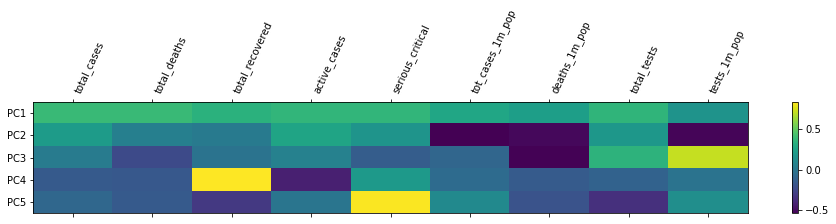

In [16]:
# Create a matshow plot of the Principal Components dependencies
fig = plt.figure(figsize = (16, 2))
plt.matshow(pca.components_, cmap = "viridis", fignum = fig.number, aspect = "auto")
plt.yticks([0, 1, 2, 3, 4], ["PC1", "PC2", "PC3", "PC4", "PC5"], fontsize = 10)
plt.colorbar()
plt.xticks(range(len(col_list)), col_list, rotation = 65, ha = "left")
plt.show()

## 6. PCA Plane Visualization

### 6.1. 2D Chart - The first 2 components

In [17]:
# Show the total explained variance ratio of model: Only 2 components
n_components = 2
sum(pca.explained_variance_ratio_[0:n_components]) * 100

83.11591165889234

In [18]:
n_vectors = 2
lengths = pca.explained_variance_[0:n_vectors]
vectors = pca.components_[0:n_components, 0:n_vectors]
means = pca.mean_[0:n_vectors]

In [19]:
# Function to draw vectors on plane
def draw_vector(v0, v1, ax = None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle = "->", linewidth = 2, shrinkA = 0, shrinkB = 0, color = "#ff7f0e")
    ax.annotate("", v1, v0, arrowprops = arrowprops)

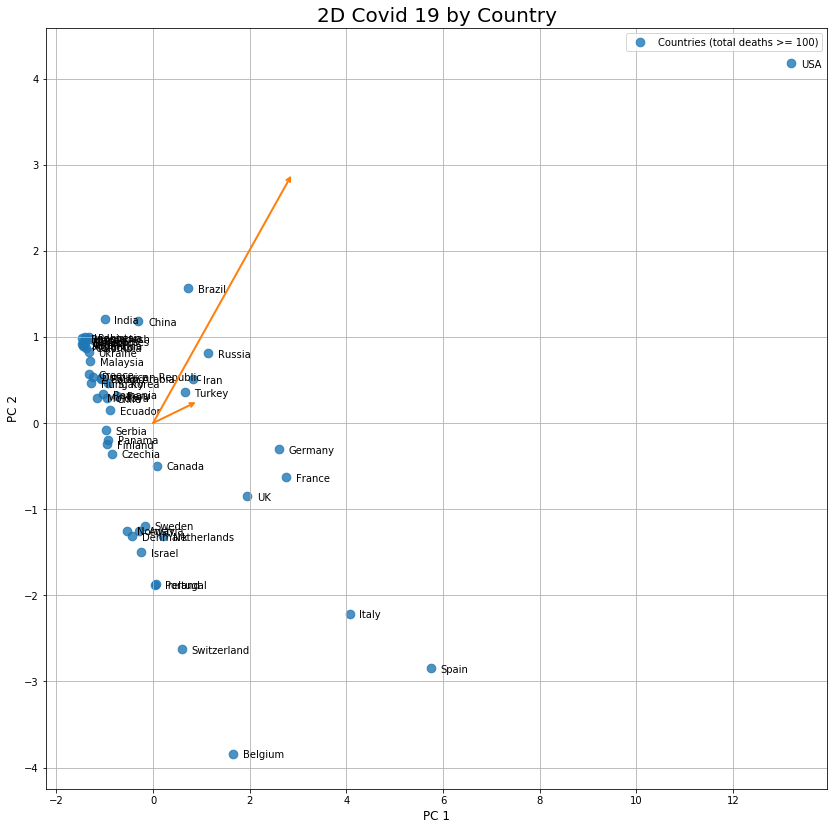

In [20]:
fig, ax3 = plt.subplots(figsize = (14, 14))

# Create 2D scatter plot
plot = sns.regplot(ax = ax3, data = df_pca, x = "PC1", y = "PC2", fit_reg = False
                   , marker = "o", color = "#1f77b4", scatter_kws = {"s": 75})

# Add annotations one by one with a loop
for ix in range(0, df_pca.shape[0]):
    plot.text(df_pca.PC1[ix] + 0.2, df_pca.PC2[ix] - 0.05, df_pca.country[ix], 
              horizontalalignment = "left", size = "medium", color = "black", weight = "normal")

# Drawing the eigen-vectors
for length, vector in zip(lengths, vectors):
    v = vector * 3 * np.sqrt(length)
    draw_vector(means, means + v)

# Plot setup
ax3.set_xlabel("PC 1", fontsize = 12)
ax3.set_ylabel("PC 2", fontsize = 12)
ax3.set_title("2D Covid 19 by Country", fontsize = 20)
ax3.legend(["Countries (total deaths >= " + str(min_deaths) + ")"])
ax3.grid()

### 6.2. 3D Chart - The first 3 components

In [21]:
# Show the total explained variance ratio of model: Only 3 components
sum(pca.explained_variance_ratio_[0:3]) * 100

90.71362768765442

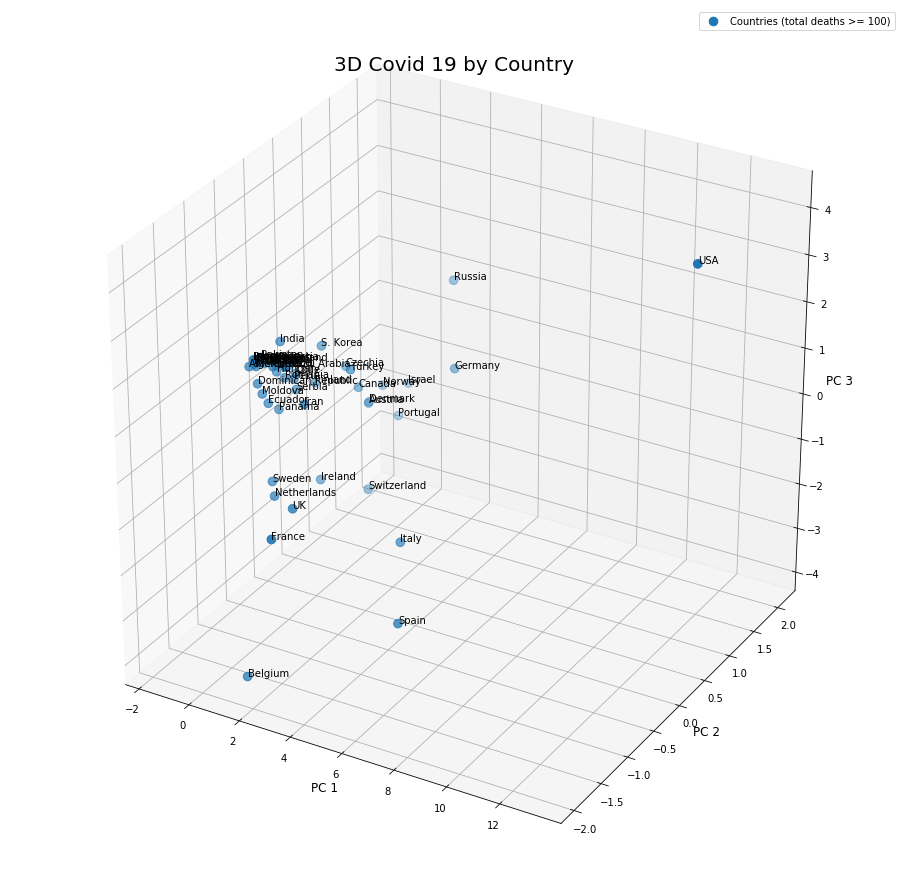

In [22]:
# Create 3D scatter plot
fig = plt.figure(figsize = (16, 16))
ax4 = fig.add_subplot(111, projection = "3d")

# Get (x, y, z) axis values
xx = df_pca.loc[:,["PC1"]].values
zz = df_pca.loc[:,["PC2"]].values
yy = df_pca.loc[:,["PC3"]].values

# Plot values
ax4.scatter(xx, yy, zz, c = "#1f77b4", marker = "o", s = 75)

# Add annotations one by one with a loop
for ix in range(0, len(x)):
    ax4.text(float(xx[ix]), float(yy[ix]), float(zz[ix]), df_pca.country[ix], 
             horizontalalignment = "left", size = "medium", color = "black", weight = "normal")

# Plot setup
ax4.set_xlabel("PC 1", fontsize = 12)
ax4.set_ylabel("PC 2", fontsize = 12)
ax4.set_zlabel("PC 3", fontsize = 12)
ax4.set_title("3D Covid 19 by Country", fontsize = 20)
ax4.legend(["Countries (total deaths >= " + str(min_deaths) + ")"])
ax4.grid()

## 7. Analysis of Similarity

### 7.1. Transpose the matrix by Countries

In [23]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,country
0,13.206274,4.182679,0.699783,-1.249623,0.092673,USA
1,4.069691,-2.211577,-0.297419,-0.066487,-1.102335,Italy
2,5.747697,-2.848945,-1.117645,1.865882,0.531214,Spain
3,2.754855,-0.631957,-1.944367,0.043657,0.270840,France
4,1.946920,-0.847394,-1.230431,-1.469149,-0.277739,UK


In [24]:
# Transpose the matrix
df_temp = df_pca.copy()
df_trans = df_temp.drop(['country'], axis = 1).T
df_trans.columns = list(df_temp['country'])
df_trans.head()

,USA,Italy,Spain,France,UK,Belgium,Germany,Iran,China,Brazil,...,Chile,Argentina,Serbia,Panama,Morocco,Bangladesh,Saudi Arabia,Greece,Moldova,Malaysia
PC1,13.206274,4.069691,5.747697,2.754855,1.946920,1.650839,2.603714,0.829948,-0.302967,0.732467,...,-0.956288,-1.429971,-0.969982,-0.933262,-1.457507,-1.475387,-1.067743,-1.331321,-1.151147,-1.306276
PC2,4.182679,-2.211577,-2.848945,-0.631957,-0.847394,-3.839207,-0.298659,0.511408,1.184156,1.564358,...,0.289777,0.908557,-0.081032,-0.191687,0.891689,0.986547,0.517334,0.572114,0.296407,0.718714
PC3,0.699783,-0.297419,-1.117645,-1.944367,-1.230431,-1.931974,1.400727,-0.512025,-0.545764,-0.785665,...,0.125991,-0.346183,0.134899,-0.189196,-0.368029,-0.373620,0.022138,-0.048173,-0.375531,-0.072852
PC4,-1.249623,-0.066487,1.865882,0.043657,-1.469149,-0.889336,2.311075,1.600461,1.751734,1.070607,...,0.038824,-0.059837,-0.167587,-0.208502,-0.083268,-0.104916,-0.136024,-0.098951,-0.125022,-0.009300
PC5,0.092673,-1.102335,0.531214,0.270840,-0.277739,-0.298158,-0.900355,0.006837,-0.911236,2.156663,...,0.097952,-0.051704,0.122692,0.120261,-0.087572,-0.102918,-0.018634,-0.013609,0.076053,-0.090633


### 7.2. Calculate Pearson correlation matrix

In [25]:
# Calculate the correlation matrix
corr = df_trans.corr(method = 'pearson')
corr.iloc[:10, :10]

,USA,Italy,Spain,France,UK,Belgium,Germany,Iran,China,Brazil
USA,1.000000,0.770552,0.612604,0.764200,0.917569,0.494746,0.378685,0.132490,-0.209047,-0.058601
Italy,0.770552,1.000000,0.930722,0.784582,0.817722,0.858006,0.757707,0.273087,-0.260838,-0.290190
Spain,0.612604,0.930722,1.000000,0.874530,0.760878,0.951458,0.677108,0.460616,-0.177838,-0.012785
France,0.764200,0.784582,0.874530,1.000000,0.883286,0.799494,0.372176,0.505137,-0.101116,0.357548
UK,0.917569,0.817722,0.760878,0.883286,1.000000,0.739460,0.276823,0.084700,-0.437956,0.110838
Belgium,0.494746,0.858006,0.951458,0.799494,0.739460,1.000000,0.504246,0.238777,-0.427105,0.017386
Germany,0.378685,0.757707,0.677108,0.372176,0.276823,0.504246,1.000000,0.495962,0.242080,-0.575011
Iran,0.132490,0.273087,0.460616,0.505137,0.084700,0.238777,0.495962,1.000000,0.763677,0.345012
China,-0.209047,-0.260838,-0.177838,-0.101116,-0.437956,-0.427105,0.242080,0.763677,1.000000,0.165884
Brazil,-0.058601,-0.290190,-0.012785,0.357548,0.110838,0.017386,-0.575011,0.345012,0.165884,1.000000


### 7.3. Plot the correlation triangle

In [26]:
# Create Players Correlation Triangle plot
def plotCorrTriangle(corr):
    
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype = np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize = (18, 18))
    
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(10, 240, n=9)
    
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask = mask, cmap = cmap, vmin = -1, vmax = 1, center = 0,
                square = True, linewidths = .5, cbar_kws = {"shrink": .5})

    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right');

    # Add title
    ax.set_title("Countries Correlation Triangle", fontsize = 20)

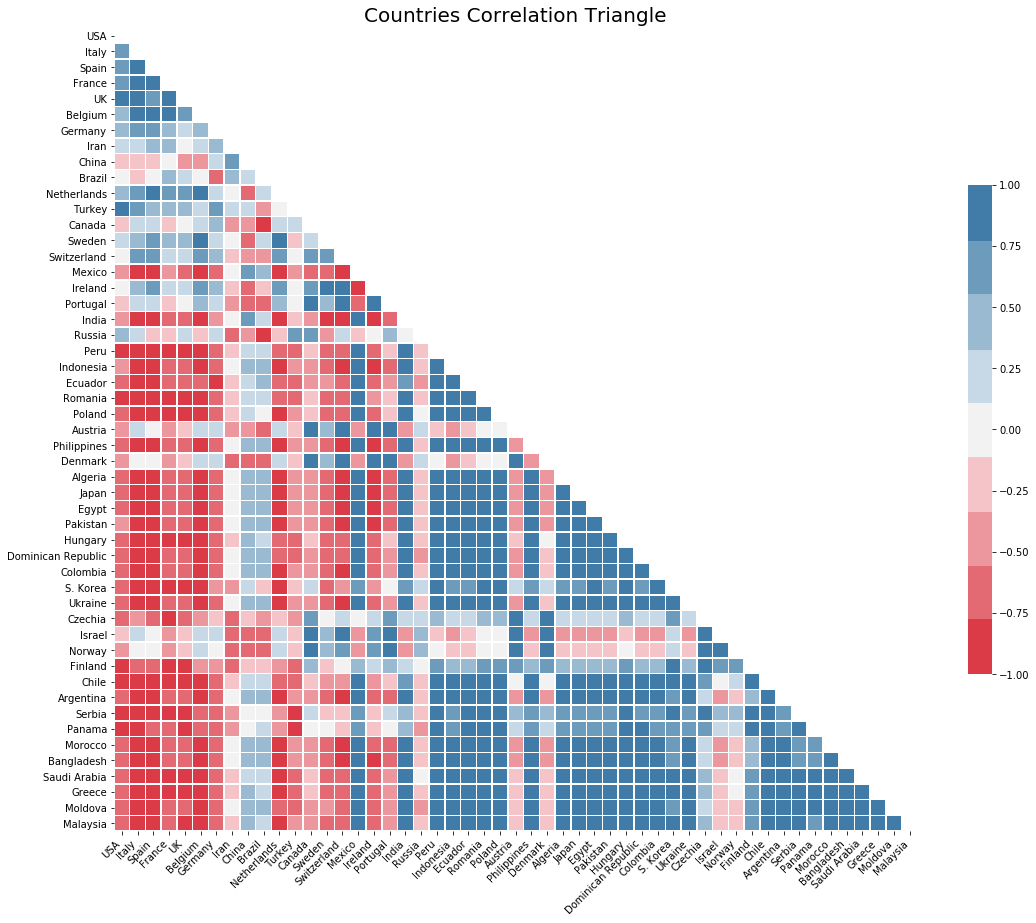

In [27]:
# Plot Correlation Triangle
plotCorrTriangle(corr)

<hr>
<p><a href="https://github.com/ansegura7/WebScraping_Covid19">« Home</a></p>